In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('nividia_pa_contribution_vs_bench_dataset_20230828.csv')
df = df.replace('',np.nan)
df

,Unnamed: 0,Symbol,total0,Beginning+Price,Ending+Price,Price+Change+(%),Ticker-Region,Port.+Beginning+Weight,Port.+Ending+Weight,Total+Return,Contribution+To Return,Port.+Ending+Market+Value,Bench.+Total+Return,Bench.+Total+Return+( Local ),Bench.+Contribution+To Return,Bench.+Contribution+to Return+( Local ),Bench.+Ending+Weight,Bench.+Beginning+Weight,port_bench
0,0,NaN,Total,NaN,NaN,13.548612,NaN,100.000000,100.000000,13.981717,13.981717,1.805173e+09,17.102878,17.102878,17.102878,17.102878,100.000000,100.000000,LION:ACFOX-USBENCH:R.1000G
1,1,67066G104,NVIDIA Corporation,181.630005,467.290009,157.275794,NVDA-US,3.112997,7.828440,157.483359,6.233630,1.413169e+08,157.420963,157.420963,4.207451,4.207451,5.288649,2.368783,LION:ACFOX-USBENCH:R.1000G
2,2,46120E602,"Intuitive Surgical, Inc.",230.169998,324.399994,40.939318,ISRG-US,3.477034,3.420285,40.939318,1.470025,6.174208e+07,40.939356,40.939356,0.209669,0.209669,0.539620,0.410782,LION:ACFOX-USBENCH:R.1000G
3,3,75886F107,"Regeneron Pharmaceuticals, Inc.",581.690002,741.909973,27.543855,REGN-US,3.070179,3.573813,27.543855,1.232681,6.451353e+07,27.543934,27.543934,0.019312,0.019312,0.024891,0.047667,LION:ACFOX-USBENCH:R.1000G
4,4,02079K107,Alphabet Inc. Class C,116.639999,133.110001,14.120382,GOOG-US,8.152466,8.677054,14.120382,1.162294,1.566359e+08,14.120411,14.120411,0.291224,0.291224,3.265130,3.018963,LION:ACFOX-USBENCH:R.1000G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115223,563,88160R101,"Tesla, Inc.",297.150024,267.429993,-10.001713,TSLA-US,1.000166,1.558026,-10.001713,-0.245984,2.796783e+06,-10.001646,-10.001646,-0.406056,-0.406056,1.880406,2.149054,LION:TLGWX-USBENCH:SP50
115224,564,26884L109,EQT Corporation,44.029999,42.180000,-20.872132,EQT-US,0.557791,NaN,-19.931420,-0.358264,NaN,1.722533,1.722533,-0.001150,-0.001150,0.039812,NaN,LION:TLGWX-USBENCH:SP50
115225,565,518439104,Estee Lauder Companies Inc. Class A,273.100006,180.000000,-43.911864,EL-US,0.511640,0.557022,-43.260179,-0.468884,9.999000e+05,-33.554683,-33.554683,-0.071387,-0.071387,0.108931,0.181864,LION:TLGWX-USBENCH:SP50
115226,566,110122108,Bristol-Myers Squibb Company,73.779999,62.189999,-15.708869,BMY-US,0.760618,1.660484,-12.922408,-0.480194,2.980705e+06,-13.765415,-13.765415,-0.056372,-0.056372,0.340994,0.451262,LION:TLGWX-USBENCH:SP50


In [2]:
df['Active Beginning Weight'] = df['Port.+Beginning+Weight'].fillna(0) - df['Bench.+Beginning+Weight'].fillna(0)
df['Active Ending Weight'] = df['Port.+Ending+Weight'].fillna(0) - df['Bench.+Ending+Weight'].fillna(0)

In [3]:
dfn = df[df['Ticker-Region']=='NVDA-US'].set_index('port_bench')

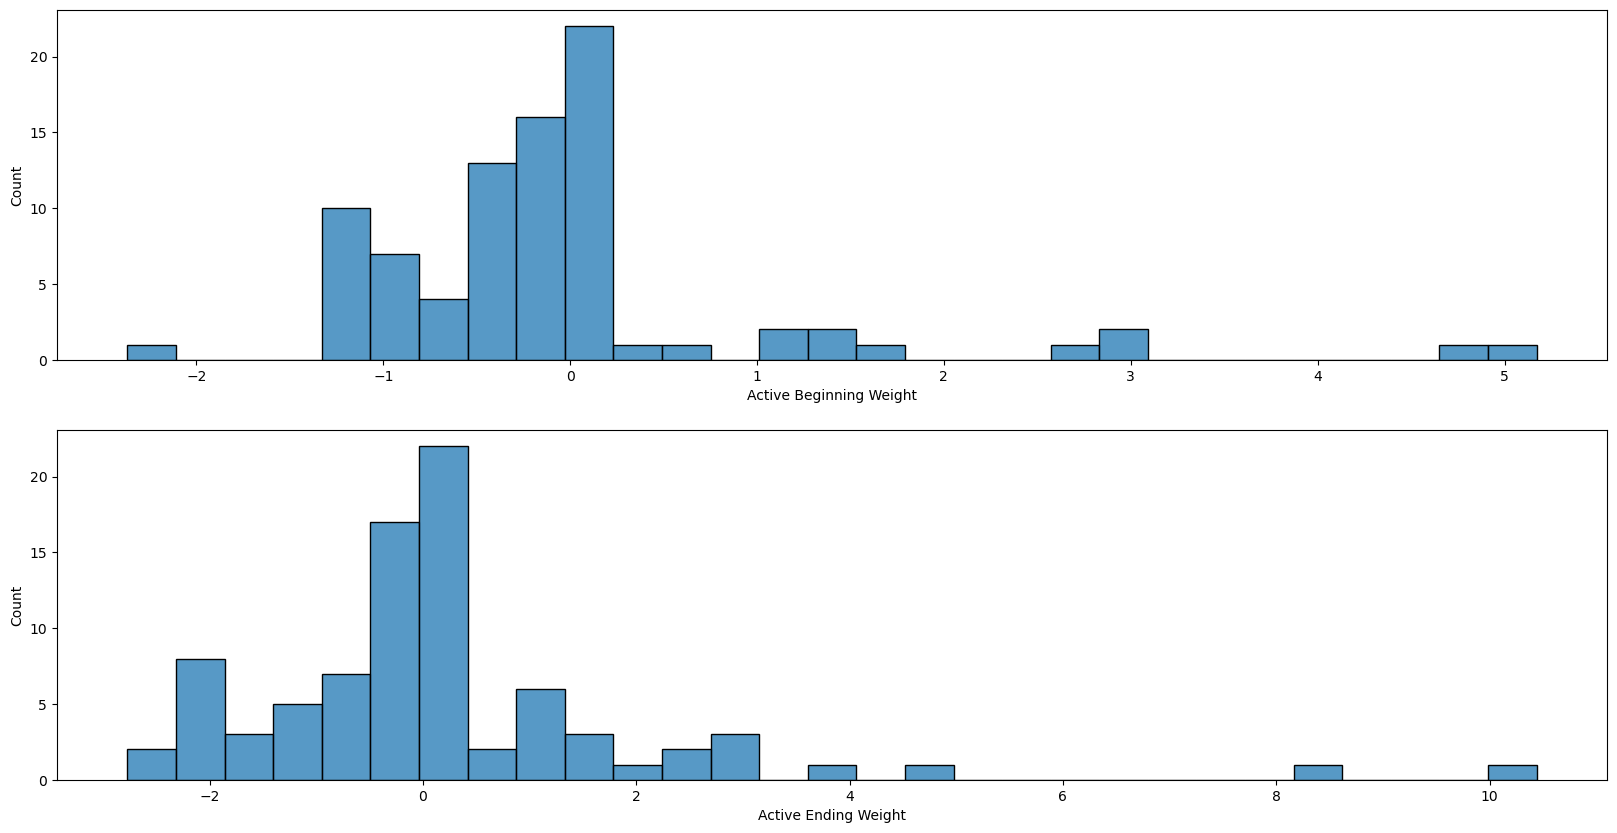

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs = plt.subplots(2,1,figsize = (20,10))
sns.histplot(data = dfn,x = 'Active Beginning Weight',ax=axs[0])
sns.histplot(data = dfn,x = 'Active Ending Weight',ax=axs[1])

plt.show()

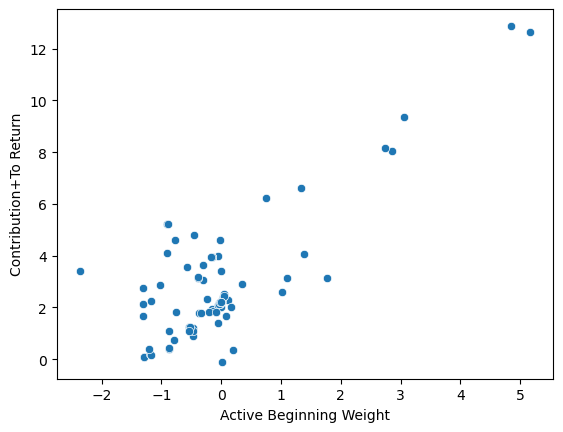

In [5]:
sns.scatterplot(data = dfn,x='Active Beginning Weight',y = 'Contribution+To Return')

plt.show()

In [8]:
dfn[dfn['Active Beginning Weight']>3]

,Unnamed: 0,Symbol,total0,Beginning+Price,Ending+Price,Price+Change+(%),Ticker-Region,Port.+Beginning+Weight,Port.+Ending+Weight,Total+Return,Contribution+To Return,Port.+Ending+Market+Value,Bench.+Total+Return,Bench.+Total+Return+( Local ),Bench.+Contribution+To Return,Bench.+Contribution+to Return+( Local ),Bench.+Ending+Weight,Bench.+Beginning+Weight,Active Beginning Weight,Active Ending Weight
port_bench,,,,,,,,,,,,,,,,,,,,
LION:FBGRX-USBENCH:R.1000G,1,67066G104,NVIDIA Corporation,181.630005,467.290009,157.275794,NVDA-US,5.421684,10.176292,157.483359,9.367520,5.037953e+09,157.420963,157.420963,4.207451,4.207451,5.288649,2.368783,3.052901,4.887644
LION:FDGRX-USBENCH:R.3000G,1,67066G104,NVIDIA Corporation,181.630005,467.290009,157.275794,NVDA-US,7.454541,13.579906,157.483359,12.623660,7.004514e+09,157.420963,157.420963,4.043450,4.043450,5.124822,2.283136,5.171405,8.455083
LION:FIKHX-USBENCH:SP50,1,67066G104,NVIDIA Corporation,181.630005,467.290009,157.275794,NVDA-US,6.151616,13.457549,157.483359,12.876775,6.797668e+08,157.420963,157.420963,2.212777,2.212777,3.016231,1.306549,4.845067,10.441318
